In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

 # カリフォルニア住宅価格のデータセット
from sklearn.datasets import fetch_california_housing

In [2]:
house_array = fetch_california_housing()
house = pd.DataFrame(house_array.data, columns = house_array.feature_names)
house

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
#欠損値なし
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


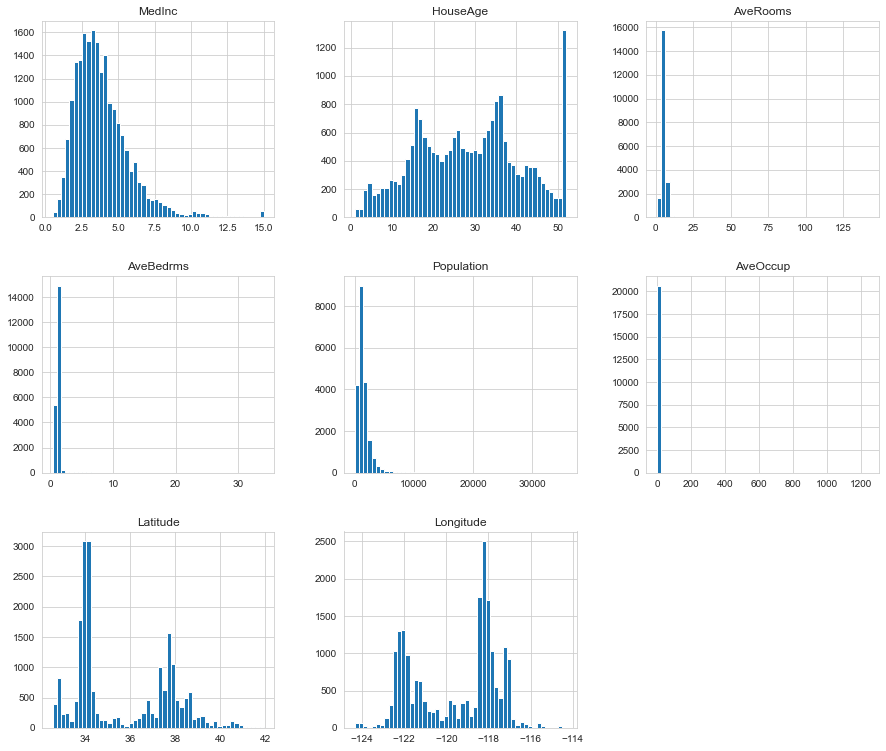

In [4]:
house.hist(bins = 50,figsize = (15,13))
plt.show()

In [5]:
#latitude, longitudeは相関低そう。
house.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [6]:
x_house = house
y_house = pd.DataFrame(house_array.target, columns = ['price'])

In [7]:
y_house.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
#外れ値の影響を小さくするために標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_house = scaler.fit_transform(x_house)

In [9]:
#分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_house, y_house, test_size = 0.1, random_state = 42)
x_test

array([[-1.15248922, -0.2891866 , -0.49989596, ...,  0.07768129,
         0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 , ..., -0.03763415,
        -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 , ..., -0.164679  ,
         1.01509336, -1.43265267],
       ...,
       [ 1.04598085, -0.60701891,  1.30275938, ...,  0.03745231,
        -0.63292337,  0.40414837],
       [-0.85024301,  0.8232265 , -0.52334486, ...,  0.05502874,
        -0.74528814,  0.62376588],
       [-0.19774493,  0.50539419, -0.19096863, ..., -0.01822029,
        -0.72656068,  0.96317477]])

In [10]:
y_test

,price
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
9477,0.96000
46,1.42500
20462,2.66300
4751,1.65000


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.intercept_, reg.coef_)

[2.06798886] [[ 0.83902321  0.12050525 -0.2730608   0.30925448 -0.00489547 -0.03759417
  -0.89430726 -0.86499789]]


In [12]:
y_pred = reg.predict(x_test)
y_pred = pd.DataFrame(data=y_pred, columns = ['price_pred'])

In [13]:
y_test = y_test.reset_index()
df_comparison = pd.concat([y_test,y_pred],axis =1)

In [14]:
df_comparison

,index,price,price_pred
0,20046,0.47700,0.730442
1,3024,0.45800,1.755064
2,15663,5.00001,2.675749
3,20484,2.18600,2.846681
4,9814,2.78000,2.612134
...,...,...,...
2059,9477,0.96000,1.911151
2060,46,1.42500,1.872576
2061,20462,2.66300,2.710533
2062,4751,1.65000,1.695205
